<a href="https://colab.research.google.com/github/juancarlosmontesdeoca/machine-learning-python-template/blob/main/Proyecto_Procesamiento_Datos_definit_jcmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de Analisis Exploratorio de Datos

Data relacionada con los Airbnb

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
!pip install tableone
from tableone import TableOne
import statsmodels.formula.api as smf

Paso 1: Planteamiento del Problema y recopilacion de datos

Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019.

Por tal razon, primero debermos investigar y familiarizarnos qué es y cómo funciona un Airbnb para saber el alcance de las variables que podemos conseguir en la base de datos.

Un Airbn es una plataforma digital que conecta a personas que quieren alquilar su vivienda (o una parte de ella) con viajeros que buscan alojamiento temporal.

Características Principales que ofrecen:

Variedad de alojamientos, desde habitaciones privadas y apartamentos completos hasta casas, cabañas o incluso lugares más originales como barcos o casas en arboles.

Reservas en línea, todo se gestiona a través a la app o pagina web, incluyendo pagos y comunicación con el anfitrión.

Sistema de reputación, tanto anfitriones como huéspedes tienen perfiles con reseñas y calificaciones.

Es importante destacar que existe la figura del anfitrión, quien es la persona que ofrece su propiedad o espacio para alquilar a través de la plataforma, cuyas actividades comprenden: publicar el anuncio, gestionar reservas, recibir a los huéspedes, mantener el alojamiento y atender consultas.

In [306]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"

In [307]:
df = pd.read_csv(url)


In [308]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


Las variables encontradas tienen el siguiente significado:

*   'id': codigo unico que se le asigno a cada registro.
*   'name': nombre o titulo del anuncio
*   'host_id': identificador del anfitrion
*   'host_name': nombre del anfitrion
*   'neighbourhood_group':grupo de localidades (distritos) principales de NY
*   'neighbourhood': barrio especifico dentro del distrito.
*   'latitude' y 'longitude': ubicaciones por coordenadas del anuncio
* 'room_type': categorias del tipo de alquiler 'Private room', 'Entire home/apt', 'Shared room'
* 'price': precio por noche indica en el anuncio
* 'minimum_nights': numero minimo de noches que debe reservarse
* 'number_of_reviews': cantidad total de resenas que ha recibido el anuncio
* 'last_review': fecha de la ultima resena recibida
* 'reviews_per_month': total de resenas por mes
* calculated_host_listings_count': numero de anuncios que tiene ese anfitrion en total (puede tener varios alojamientos)
* 'availability_365': numero de dias que el anuncio esta disponible para reservar en un año

Según la data suministrada, cual o cuales serian las variables que mas inciden en el precio del alquiler en el Airbnb.

Paso 2. Exploración y limpieza de datos

In [309]:
df.shape

(48895, 16)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [311]:
#observar que hay en cada categoria de las variables object

object_columnas = df.select_dtypes(include='object').columns
for col in object_columnas:
    print(f"Columna: {col}")
    print(df[col].unique()[:5])  # primeras 5 categorías
    print("Cantidad de categorías únicas:", df[col].nunique())
    total = df[col].shape[0]
    duplicados = df[col].duplicated().sum()
    nulos = df[col].isnull().sum()
    print(f"Total registros: {total}")
    print(f"Duplicados: {duplicados}")
    print(f"Valores nulos: {nulos}")
    print("-"*50)

Columna: name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
Cantidad de categorías únicas: 47905
Total registros: 48895
Duplicados: 989
Valores nulos: 16
--------------------------------------------------
Columna: host_name
['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
Cantidad de categorías únicas: 11452
Total registros: 48895
Duplicados: 37442
Valores nulos: 21
--------------------------------------------------
Columna: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Cantidad de categorías únicas: 5
Total registros: 48895
Duplicados: 48890
Valores nulos: 0
--------------------------------------------------
Columna: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
Cantidad de categorías únicas: 221
Total registros: 48895
Duplicados: 48674
Valores nulos: 0
-------------------------

In [312]:
#observar que hay en cada categoria de las variables int

int_columnas = df.select_dtypes(include='int64').columns #observar que hay en cada categoria int
for col in int_columnas:
    print(f"Columna: {col}")
    print(f"Lista las 5 primeras: {df[col].unique()[:5]}")  # primeras 5 categorías
    print("Cantidad de categorías únicas:", df[col].nunique())
    total = df[col].shape[0]
    duplicados = df[col].duplicated().sum()
    nulos = df[col].isnull().sum()
    print(f"Total registros: {total}")
    print(f"Duplicados: {duplicados}")
    print(f"Valores nulos: {nulos}")
    print("-"*50)

Columna: id
Lista las 5 primeras: [2539 2595 3647 3831 5022]
Cantidad de categorías únicas: 48895
Total registros: 48895
Duplicados: 0
Valores nulos: 0
--------------------------------------------------
Columna: host_id
Lista las 5 primeras: [2787 2845 4632 4869 7192]
Cantidad de categorías únicas: 37457
Total registros: 48895
Duplicados: 11438
Valores nulos: 0
--------------------------------------------------
Columna: price
Lista las 5 primeras: [149 225 150  89  80]
Cantidad de categorías únicas: 674
Total registros: 48895
Duplicados: 48221
Valores nulos: 0
--------------------------------------------------
Columna: minimum_nights
Lista las 5 primeras: [ 1  3 10 45  2]
Cantidad de categorías únicas: 109
Total registros: 48895
Duplicados: 48786
Valores nulos: 0
--------------------------------------------------
Columna: number_of_reviews
Lista las 5 primeras: [  9  45   0 270  74]
Cantidad de categorías únicas: 394
Total registros: 48895
Duplicados: 48501
Valores nulos: 0
-----------

In [313]:
#observar las variables float incluyendo 'latitude' y 'longitude'

float_columnas = df.select_dtypes(include='float').columns
for col in float_columnas:
    print(f"Columna: {col}")
    print(f"Lista las 5 primeras: {df[col].unique()[:5]}")  # primeras 5 categorías
    print("Cantidad de categorías únicas:", df[col].nunique())
    total = df[col].shape[0]
    duplicados = df[col].duplicated().sum()
    nulos = df[col].isnull().sum()
    print(f"Total registros: {total}")
    print(f"Duplicados: {duplicados}")
    print(f"Valores nulos: {nulos}")
    print("-"*50)

Columna: latitude
Lista las 5 primeras: [40.64749 40.75362 40.80902 40.68514 40.79851]
Cantidad de categorías únicas: 19048
Total registros: 48895
Duplicados: 29847
Valores nulos: 0
--------------------------------------------------
Columna: longitude
Lista las 5 primeras: [-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
Cantidad de categorías únicas: 14718
Total registros: 48895
Duplicados: 34177
Valores nulos: 0
--------------------------------------------------
Columna: reviews_per_month
Lista las 5 primeras: [0.21 0.38  nan 4.64 0.1 ]
Cantidad de categorías únicas: 937
Total registros: 48895
Duplicados: 47957
Valores nulos: 10052
--------------------------------------------------


De acuerdo con lo anterior tendriamos dos tipos de variables:

*Categoricas 8 (name, host_name, neighborhood_group, neighbourhood, room_type, last_review) y (id, host_id) que aun siendo variables numericas, sus categorias son discretas.

*Numericas 8 (price, minimun_nights, number_of_reviews, calculated_host_listings_count, availability_365, latitude, longitude, reviews_per_month)

Cabe destacar que hay variabeles con muchas subclasificaciones como 'name' y 'host_name', las cuales no son variables que nos aporten informacion valiosa para responder las preguntas iniciales del proyecto, ya que son variables tipo nombre,por tal razon se excluyen del estudio. Al igual que la variable 'id', ya que la misma es un identificador unico de cada registro, careciendo de significado analitico.

Las variables que usualmente tienen nombres no siempre son consistentes o estandarizados, lo que dificulta el analisis, sin embargo la variable 'neighbourhood', aun cuando pudiera incluir muchas categorias, se va a dejar, ya que quizas puede ser interesante ver en que zonas exactamente se concentran la mayor cantidad de inmuebles en alquiler y su precio.


Por otro lado, a la variable 'last_review',se le dara un tratamiento especial para que sea aprovechada conjuntamente con la variable reviews_per_month.

En tal sentido, se agregaran las siguientes variables:

*'meses_trans_ult_review'(meses transcurridos desde la ultima resena al   31/12/2019). Esta variable sera un indicador de vigencia de la actividad del anuncio. Si este valor es bajo, sugiere que el anuncio esta activo y con huespedes actuales.

*Podemos usar una nueva variable que incluya reviews_per_month y meses_trans_ult_review, para crear una tasa de visibilidad relativa, donde la primera variable mide las resenas promedio y la segunda la colocamos en una fraccion con el objeto de penalizar las resenas que tienen mucho tiempo. Los valores mas altos de esta tasa de visibilidad nos reflejaria que tan visible y vigente esta el anuncio al 31/12/2019. Hay resenas de anos anteriores al 2019, por tal razon se busca penalizar las de vieja data.

De acuerdo con todo lo indicado, creamos un nuevo DataFrame excluyendo las columnas 'name', 'host_name','id', 'host_id', 'last_review' y 'reviews_per_month' e incorporamos una nueva variable llamada 'tasa_visibilidad'.

In [314]:
#calculo de la variable tiempo_transcurrido

df['tiempo_transcurrido'] = (
    (pd.to_datetime('2019-12-31') - pd.to_datetime(df['last_review']))
)
df['meses_trans_ult_review'] = df['tiempo_transcurrido'].dt.days / 30



In [315]:
#calculo de la tasa de visibilidad del anuncio
df['tasa_visibilidad'] = df['reviews_per_month'] * (1 / (1+ df['meses_trans_ult_review']))

In [316]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,tiempo_transcurrido,meses_trans_ult_review,tasa_visibilidad
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,438 days,14.600000,0.013462
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,224 days,7.466667,0.044882
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaT,NaN,NaN


In [317]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'tiempo_transcurrido', 'meses_trans_ult_review',
       'tasa_visibilidad'],
      dtype='object')

In [318]:
#Creamos el nuevo DataFrame

df_modif = df.copy()

df_modif = df_modif.drop(columns=["id", "name", "host_id", "host_name",
                                  "number_of_reviews", "last_review",
                                  "reviews_per_month", "tiempo_transcurrido",
                                  "meses_trans_ult_review"])


In [319]:
df_modif.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,tasa_visibilidad
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,0.013462
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355,0.044882
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365,NaN


Paso 3. Analisis de variables univariante

In [320]:
df_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
 9   tasa_visibilidad                38843 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ MB


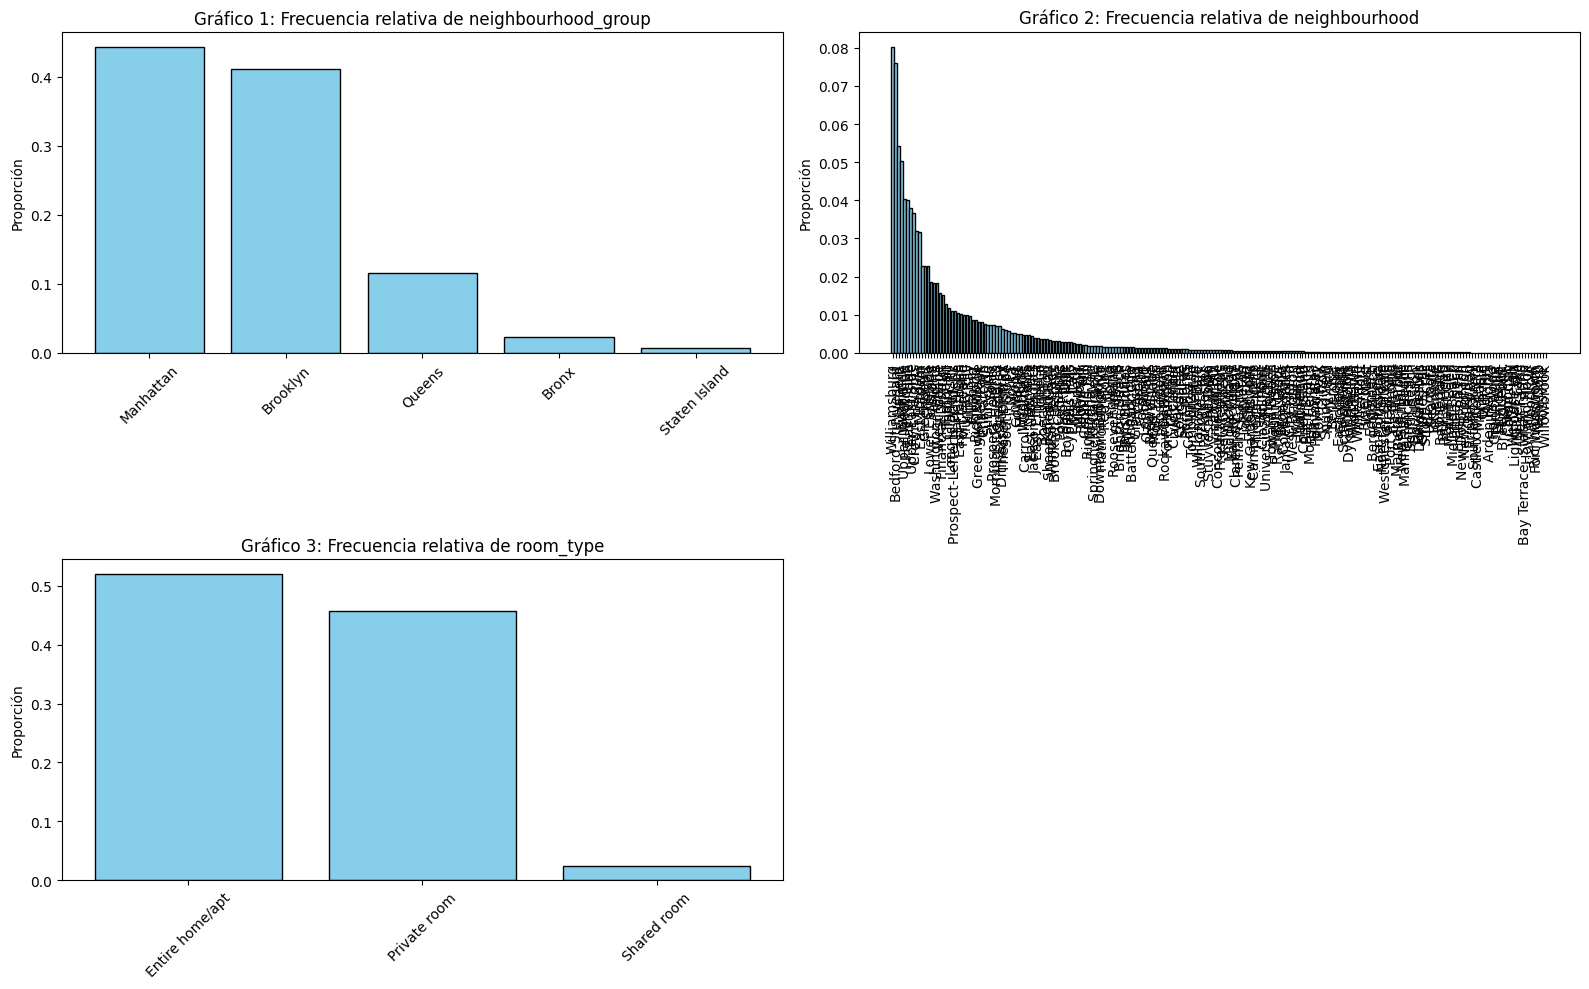

In [321]:
#graficos sobre las variables categoricas

object_columnas = ['neighbourhood_group', 'neighbourhood', 'room_type']

fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Iterar columnas y ejes al mismo tiempo
for i, (col, ax) in enumerate(zip(object_columnas, axes.ravel())):
    frec_rel = df_modif[col].value_counts(normalize=True)
    ax.bar(frec_rel.index, frec_rel.values, color='skyblue', edgecolor='black')
    ax.set_title(f"Gráfico {i+1}: Frecuencia relativa de {col}")
    ax.set_ylabel("Proporción")
    ax.tick_params(axis='x', rotation=90 if col in ['neighbourhood','last_review_date_str'] else 45)

# Ocultar el cuarto gráfico vacío
axes[1,1].axis('off')

plt.tight_layout()
plt.show()


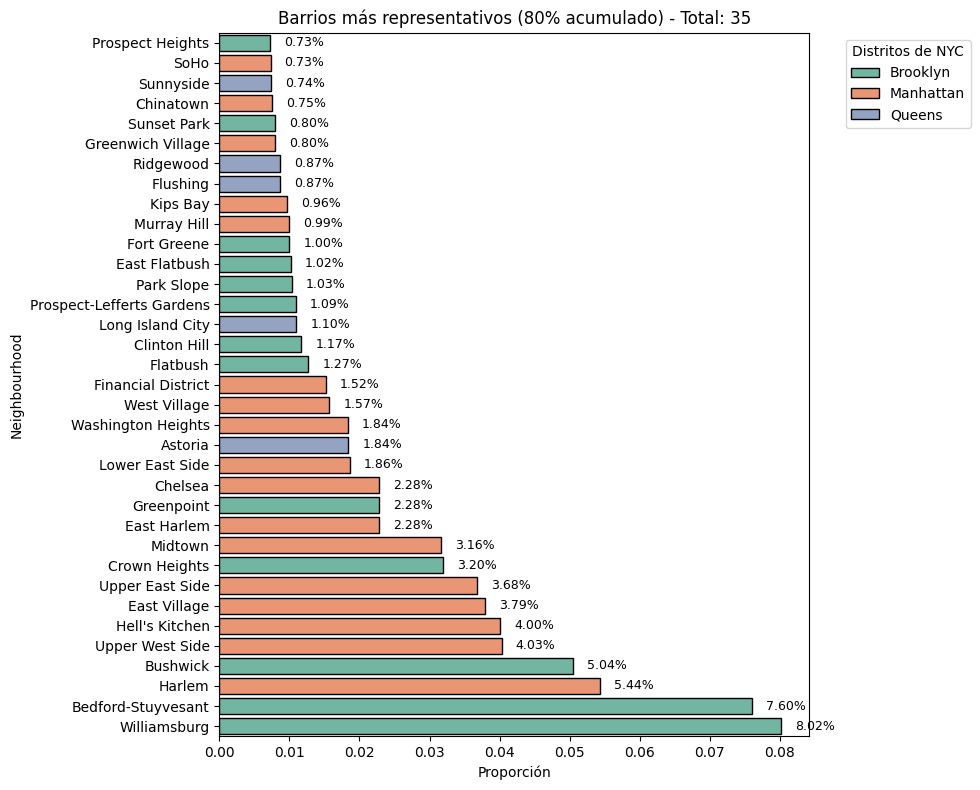

In [322]:
#Detallando un poco mas el grafico 2

# Frecuencia relativa de neighbourhood
frec_rel = df_modif['neighbourhood'].value_counts(normalize=True)

# Barrios que concentran el 80% acumulado
top_neigh = frec_rel[frec_rel.cumsum() <= 0.8].sort_values(ascending=True)
num_barrios_80 = len(top_neigh)

# Dataframe auxiliar con grupo y proporción
df_top = df_modif[['neighbourhood','neighbourhood_group']].drop_duplicates()
df_top = df_top.set_index('neighbourhood').loc[top_neigh.index]
df_top['proporcion'] = top_neigh.values

# Gráfico
plt.figure(figsize=(10,8))
sns.barplot(
    data=df_top, y=df_top.index, x='proporcion',
    hue='neighbourhood_group', dodge=False, palette="Set2", edgecolor="black"
)

plt.title(f"Barrios más representativos (80% acumulado) - Total: {num_barrios_80}")
plt.xlabel("Proporción")
plt.ylabel("Neighbourhood")

# Añadir porcentajes al final de cada barra
for i, v in enumerate(df_top['proporcion']):
    plt.text(v+0.002, i, f"{v*100:.2f}%", va='center', fontsize=9)

plt.legend(title="Distritos de NYC", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()



Observaciones:

1. En el grafico 1. Manhattan y Brooklyn concentran mas del 80% de los alquileres.

2. En el grafico de arriba (Grafico 2 modificado) relacionado con los 'neighbourhood', 35 barrios concentran el 80% de los alquileres.

3. En el grafico 3. los alquileres de 'Private room' y Entire home/apt' concentran mas del 90% de los alquileres.

**Analisis sobre Variables Numericas**

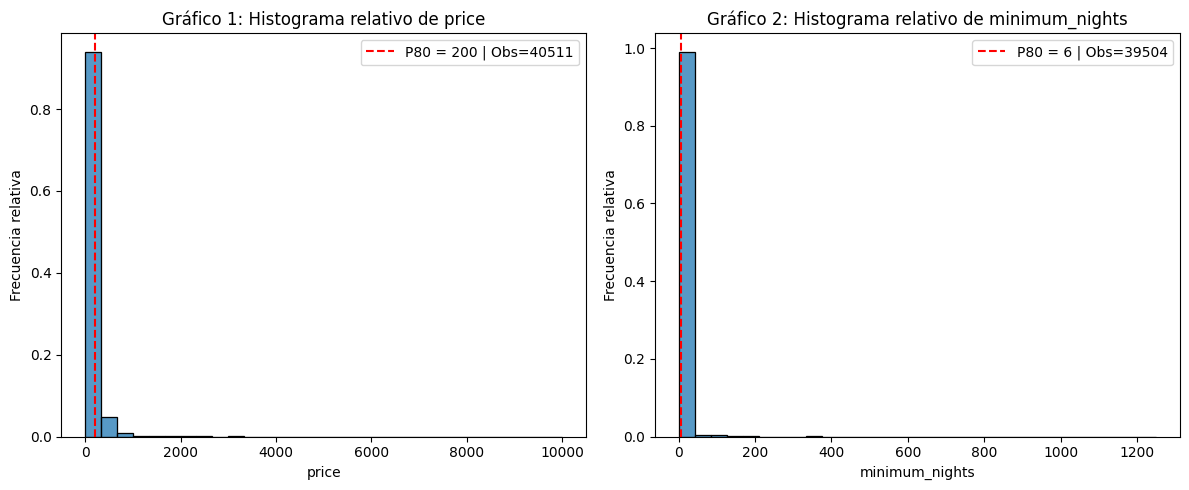

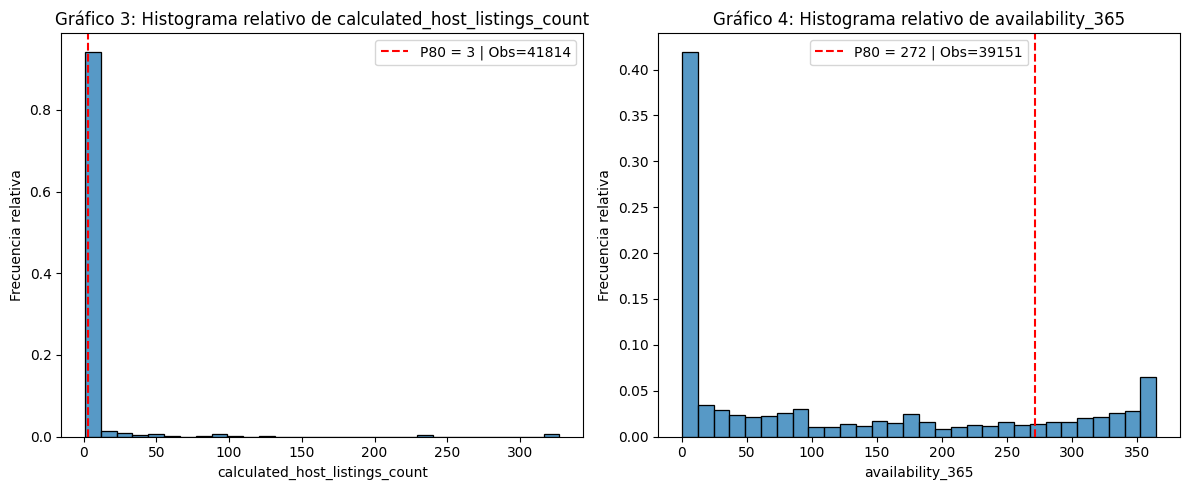

In [323]:
#analisis de variables con formato int

int_columnas = df_modif.select_dtypes(include='int64').columns

# Número de columnas int
n_cols = len(int_columnas)

# Graficar en grupos de 2 por fila
grafico_num = 1  # contador de gráficos
for i in range(0, n_cols, 2):
    subset = int_columnas[i:i+2]
    fig, axes = plt.subplots(1, len(subset), figsize=(12,5))  # 1 fila, hasta 2 columnas

    for j, col in enumerate(subset):
        sns.histplot(df_modif[col], stat="probability", bins=30, ax=axes[j])

        # Calcular percentil 80 y número de observaciones <= P80
        p80 = df_modif[col].quantile(0.8)
        n80 = (df_modif[col] <= p80).sum()

        # Dibujar línea vertical en el percentil 80
        axes[j].axvline(p80, color='red', linestyle='--',
                        label=f'P80 = {p80:.0f} | Obs={n80}')

        axes[j].set_title(f"Gráfico {grafico_num}: Histograma relativo de {col}")
        axes[j].set_ylabel("Frecuencia relativa")
        axes[j].set_xlabel(col)
        axes[j].legend()

        grafico_num += 1  # incrementar el contador

    plt.tight_layout()
    plt.show()

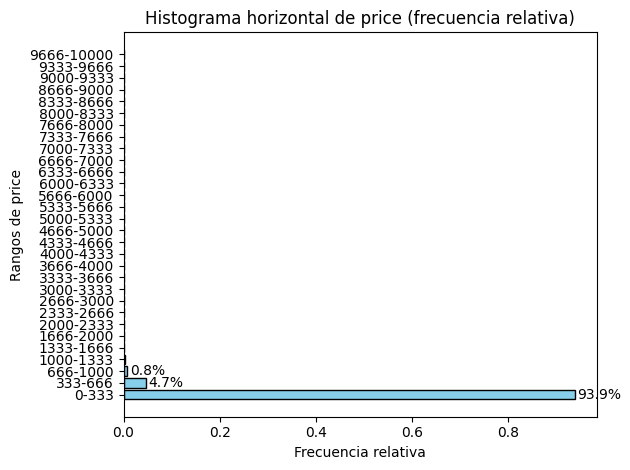

In [324]:
#Detallando un poco mas el grafico 1 relacionado con price

# Calcular frecuencias y límites de bins para price
counts, bins = np.histogram(df_modif['price'], bins=30)

# Calcular frecuencias relativas (proporción)
freq_rel = counts / counts.sum()

# Crear histograma con barras horizontales usando frecuencia relativa
plt.barh(range(len(counts)), freq_rel, color='skyblue', edgecolor='black')

# Etiquetas de los intervalos (bins)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
plt.yticks(range(len(counts)), bin_labels)

# Añadir porcentaje SOLO en las 3 primeras barras
for i, v in enumerate(freq_rel[:3]):
    plt.text(v + 0.005, i, f"{v*100:.1f}%", va='center')

plt.ylabel('Rangos de price')
plt.xlabel('Frecuencia relativa')
plt.title('Histograma horizontal de price (frecuencia relativa)')
plt.tight_layout()
plt.show()

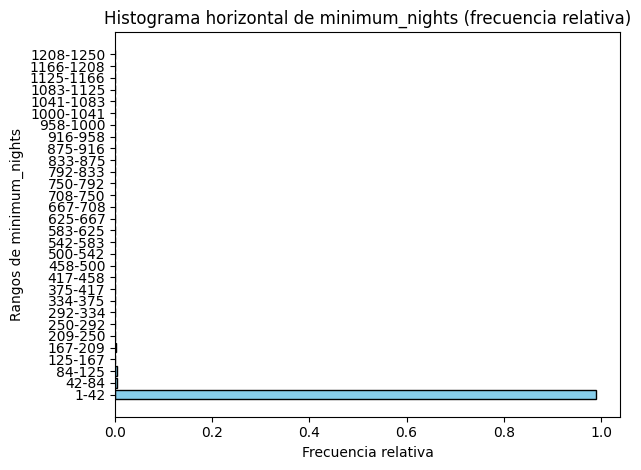

In [325]:
#Detallando un poco mas el grafico 2 relacionado con minimum_nights

# Calcular frecuencias y límites de bins para minimum_nights
counts, bins = np.histogram(df_modif['minimum_nights'], bins=30)

# Calcular frecuencias relativas (proporción)
freq_rel = counts / counts.sum()

# Crear histograma con barras horizontales usando frecuencia relativa
plt.barh(range(len(counts)), freq_rel, color='skyblue', edgecolor='black')

# Etiquetas de los intervalos (bins)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
plt.yticks(range(len(counts)), bin_labels)

plt.ylabel('Rangos de minimum_nights')
plt.xlabel('Frecuencia relativa')
plt.title('Histograma horizontal de minimum_nights (frecuencia relativa)')
plt.tight_layout()
plt.show()

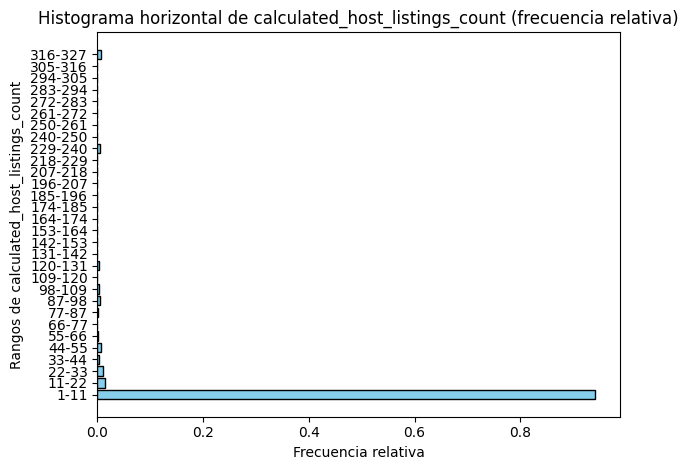

In [326]:
#Detallando un poco mas el grafico 3 relacionado con calculated_host_listings_count

# Calcular frecuencias y límites de bins para calculated_host_listings_count
counts, bins = np.histogram(df_modif['calculated_host_listings_count'], bins=30)

# Calcular frecuencias relativas (proporción)
freq_rel = counts / counts.sum()

# Crear histograma con barras horizontales usando frecuencia relativa
plt.barh(range(len(counts)), freq_rel, color='skyblue', edgecolor='black')

# Etiquetas de los intervalos (bins)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
plt.yticks(range(len(counts)), bin_labels)

plt.ylabel('Rangos de calculated_host_listings_count')
plt.xlabel('Frecuencia relativa')
plt.title('Histograma horizontal de calculated_host_listings_count (frecuencia relativa)')
plt.tight_layout()
plt.show()

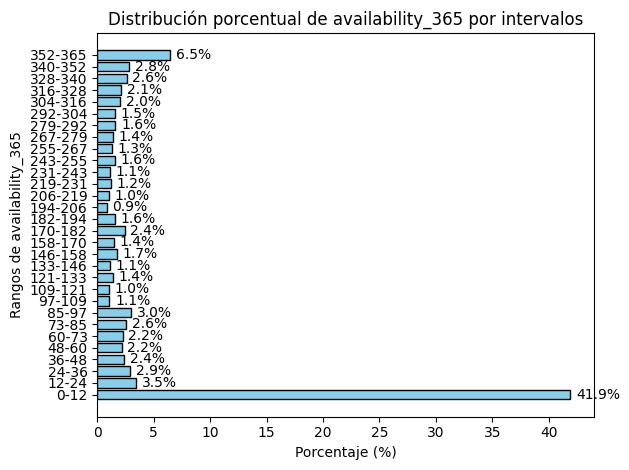

In [327]:
#Detallando un poco mas el grafico 4 relacionado con availability_365

# Calcular frecuencias y límites de bins para availability_365
counts, bins = np.histogram(df_modif['availability_365'], bins=30)

# Calcular porcentajes
percentages = counts / counts.sum() * 100

# Crear gráfico de barras horizontal
plt.barh(range(len(counts)), percentages, color='skyblue', edgecolor='black')

# Etiquetar cada barra con el rango de su bin
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
plt.yticks(range(len(counts)), bin_labels)

# Añadir porcentaje al final de cada barra
for i, v in enumerate(percentages):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.ylabel('Rangos de availability_365')
plt.xlabel('Porcentaje (%)')
plt.title('Distribución porcentual de availability_365 por intervalos')
plt.tight_layout()
plt.show()

Se puede observar de los graficos anteriores:

*Grafico 1 (price). se observa que tiene un sesgo fuerte a la izquierda, y que el 80% de los alquileres tienen precio menor a $200, mientras que en el complementario se observa que los alquileres menores a $333 representan cerca del 94%.

*Grafico 2 (minimum_nights), sesgo hacia la izquierda y hasta 6 noches de alquiler representan el 80% de los alquileres. En el grafico complementario casi la totalidad de los anuncios tienen alquileres menores a 42 noches.

*Grafico 3 (calculated_host_listings_count), sesgo fuerte hacia la izquierda y muestra que el 80% de los anfitriones tienen hasta 3 anuncios (puede tener varios alojamientos). En el grafico complementario, mas del 80% tiene entre 1 y 11 anuncios.

*Grafico 4 y su adicional sobre (availability_365). Tiene un pico en ambos extremos y en el centro se comporta con mas regularidad. Cerca del 42% de los inmuebles tienen dispobilidad entre 0-12 dias y el 6.5% disponibilidad entre 352-365.

**Analisis de variables numericas con formato float**

Dentro de ellas estan latitude, longitude que en conjunto dan una ubicacion. Mientras la tasa de visibilidad es una variable continua, pero se agrupara en intervalos para no perder de vista los Nan que tienen, dado que pudieran tener un significado adicional a no cargado (registrado) como que se incuentra inactivo.

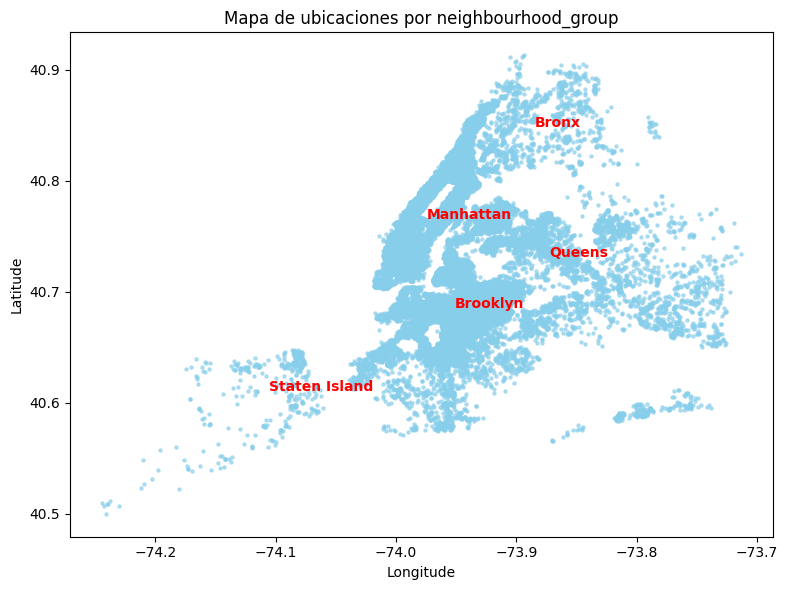

In [328]:
#Grafico de latitude y longitude

# Crear gráfico de dispersión con puntos pequeños, se usara un grafico estatico
plt.figure(figsize=(8,6))
plt.scatter(df_modif['longitude'], df_modif['latitude'],
            s=5, c='skyblue', alpha=0.6)

# Añadir etiquetas de neighbourhood_group en posiciones representativas
for group in df_modif['neighbourhood_group'].unique():
    subset = df_modif[df_modif['neighbourhood_group'] == group]
    # Calcular centro aproximado de cada grupo
    x_mean = subset['longitude'].mean()
    y_mean = subset['latitude'].mean()
    plt.text(x_mean, y_mean, group, fontsize=10, weight='bold', color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de ubicaciones por neighbourhood_group')
plt.tight_layout()
plt.show()

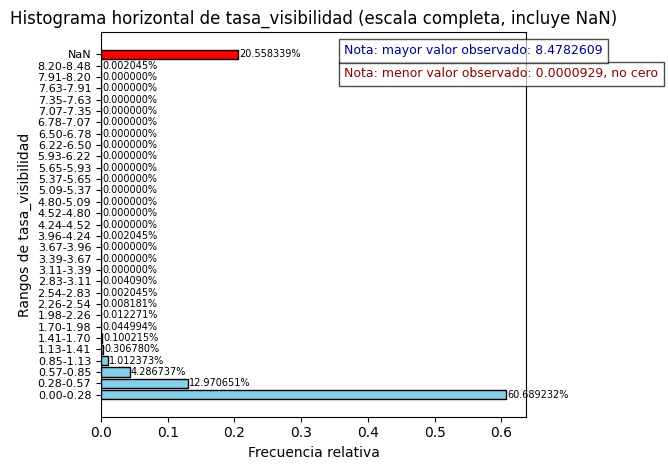

In [329]:
"""Grafico tasa_visibilidad que aun siendo una variable continua, se
forzara su discretizacion a objeto de visualizarla en un histograma y
asi observar los Nan y la distribucion del resto de los valores"""

# Separar valores válidos y contar NaN
valid_values = df_modif['tasa_visibilidad'].dropna()
nan_count = df_modif['tasa_visibilidad'].isna().sum()
total_count = len(df_modif['tasa_visibilidad'])

# Calcular frecuencias y bins para valores válidos
counts, bins = np.histogram(valid_values, bins=30)
freq_rel = counts / total_count   # proporción respecto al total, incluyendo NaN

# Escala completa: desde el mínimo hasta el máximo observado
min_val = valid_values.min()
max_val = valid_values.max()
mask = (bins[:-1] >= min_val) & (bins[:-1] <= max_val)

filtered_counts = counts[mask]
filtered_bins = bins[:-1][mask]
filtered_freq_rel = filtered_counts / total_count
bin_labels = [f"{filtered_bins[i]:.2f}-{filtered_bins[i]+(bins[1]-bins[0]):.2f}"
              for i in range(len(filtered_bins))]

# Añadir categoría NaN como barra adicional
freq_rel_with_nan = list(filtered_freq_rel) + [nan_count / total_count]
bin_labels.append("NaN")

# Crear histograma horizontal con porcentajes
plt.barh(range(len(freq_rel_with_nan)), freq_rel_with_nan,
         color=['skyblue']*len(filtered_freq_rel) + ['red'], edgecolor='black')

plt.yticks(range(len(freq_rel_with_nan)), bin_labels, fontsize=8)

# Añadir porcentajes en cada barra con 6 decimales
for i, v in enumerate(freq_rel_with_nan):
    plt.text(v + 0.002, i, f"{v*100:.6f}%", va='center', fontsize=7)

# Notas dentro del gráfico aclarando mínimo y máximo observados
plt.text(max(freq_rel_with_nan)*0.6, len(freq_rel_with_nan)-3,
         f"Nota: menor valor observado: {min_val:.7f}, no cero",
         fontsize=9, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

plt.text(max(freq_rel_with_nan)*0.6, len(freq_rel_with_nan)-1,
         f"Nota: mayor valor observado: {max_val:.7f}",
         fontsize=9, color='darkblue', bbox=dict(facecolor='white', alpha=0.7))

plt.ylabel('Rangos de tasa_visibilidad')
plt.xlabel('Frecuencia relativa')
plt.title('Histograma horizontal de tasa_visibilidad (escala completa, incluye NaN)')
plt.tight_layout()
plt.show()

In [330]:
#Para ver si efectivamente habian valores cero
df_modif['tasa_visibilidad'].describe()

,tasa_visibilidad
count,38843.000000
mean,0.175579
std,0.237743
min,0.000093
25%,0.010900
50%,0.074704
75%,0.270270
max,8.478261


In [331]:
# Filtrando registros con tasa_visibilidad para chequear coherencia

df_filtrado = df[df['tasa_visibilidad']>5 ]

# Mostrar solo las columnas relevantes
df_filtrado[['last_review','reviews_per_month', 'meses_trans_ult_review', 'tasa_visibilidad']].head(10)

,last_review,reviews_per_month,meses_trans_ult_review,tasa_visibilidad
42075,2019-07-07,58.5,5.9,8.478261


Observaciones:

*En el grafico 'Mapa de ubicaciones por neighbourhood_group', se observa mas relleno con los puntos azules en los distritos de Manhattan y Brooklyn, lo que indica mayor cantidad de anuncios en esos distritos, como ya hemos apreciado con anterioridad.

*En el grafico Histograma horizontal de tasa_visibilidad (incluye NaN), aunque siendo una variable continua,se busco discretizar solo a fines informativos que esta dando esa tasa. Como esa tasa es producto review_per_month penalizada por el tiempo transcurrido desde la ultima resena, queda claro que mientras mas se acerque dicha tasa a cero, se trata de anuncios que teniendo mas tiempo desde la ultima resena o teniendo una resena incluso de 2019, tienen un bajo review_per_month, por ende son poco populares. Por el contrario, el caso de la tasa de visibilidad de 8.478261 tuvo su ultima resena en julio de 2019 y un promedio de 58.5 resenas por mes, por lo tanto es un anuncio popular dentro de todos los publicados.

In [332]:
#verificando normalidad en las variables usando normaltest dado que shapiro no es confiable para variables superiores a 5000 registros

from scipy.stats import normaltest

columns = ['price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       ]

for col in columns:
    stat, p = normaltest(df[col])
    print(f"Columna: {col} | p-value={p:.4f}")



Columna: price | p-value=0.0000
Columna: minimum_nights | p-value=0.0000
Columna: calculated_host_listings_count | p-value=0.0000
Columna: availability_365 | p-value=0.0000


En todos los casos p-value < 0.05. Implica rechazar hipotesis nula y aceptar la alternativa que seria no existe evidencia en mis datos que las variables estudiadas tengan una distribucion normal.


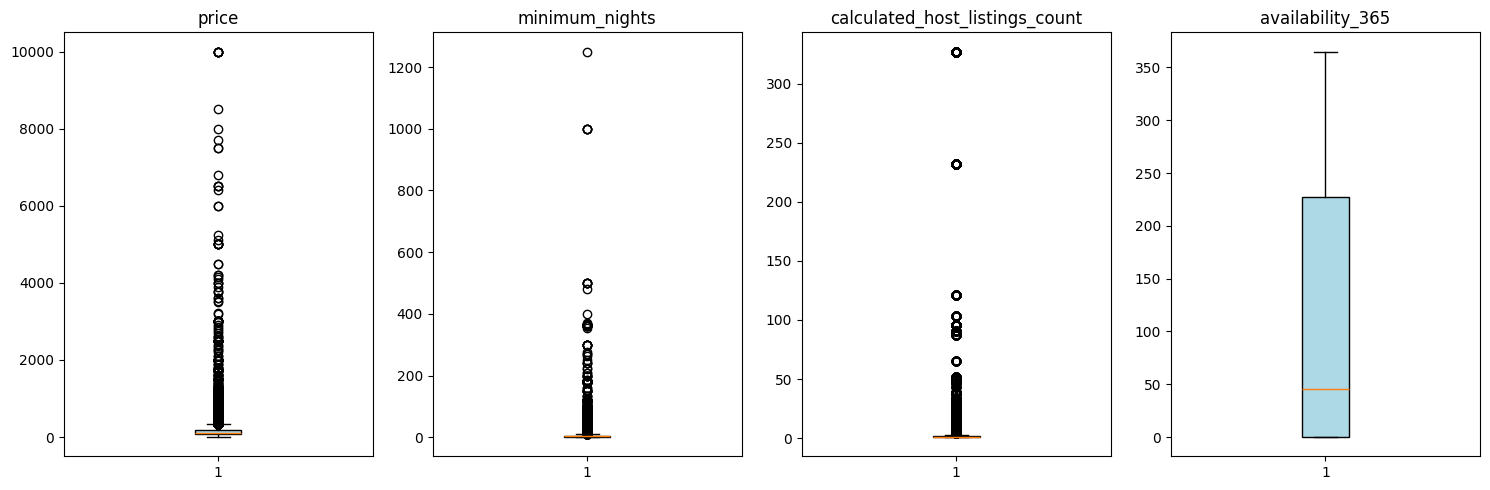

In [333]:
#graficando veficando como se comportan los datos en las variables nonnormales

columns = ['price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       ]
plt.figure(figsize=(15,5))

for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)   # los 4 cuatro en una linea
    plt.boxplot(df[col],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    plt.title(col)

plt.tight_layout()
plt.show()


Encontramos outliers en 'price', 'minimum_nights','calculated_host_listings_count'.

*Paso 4. Analisis de variables multivariante*

Analisis numerico - numerico

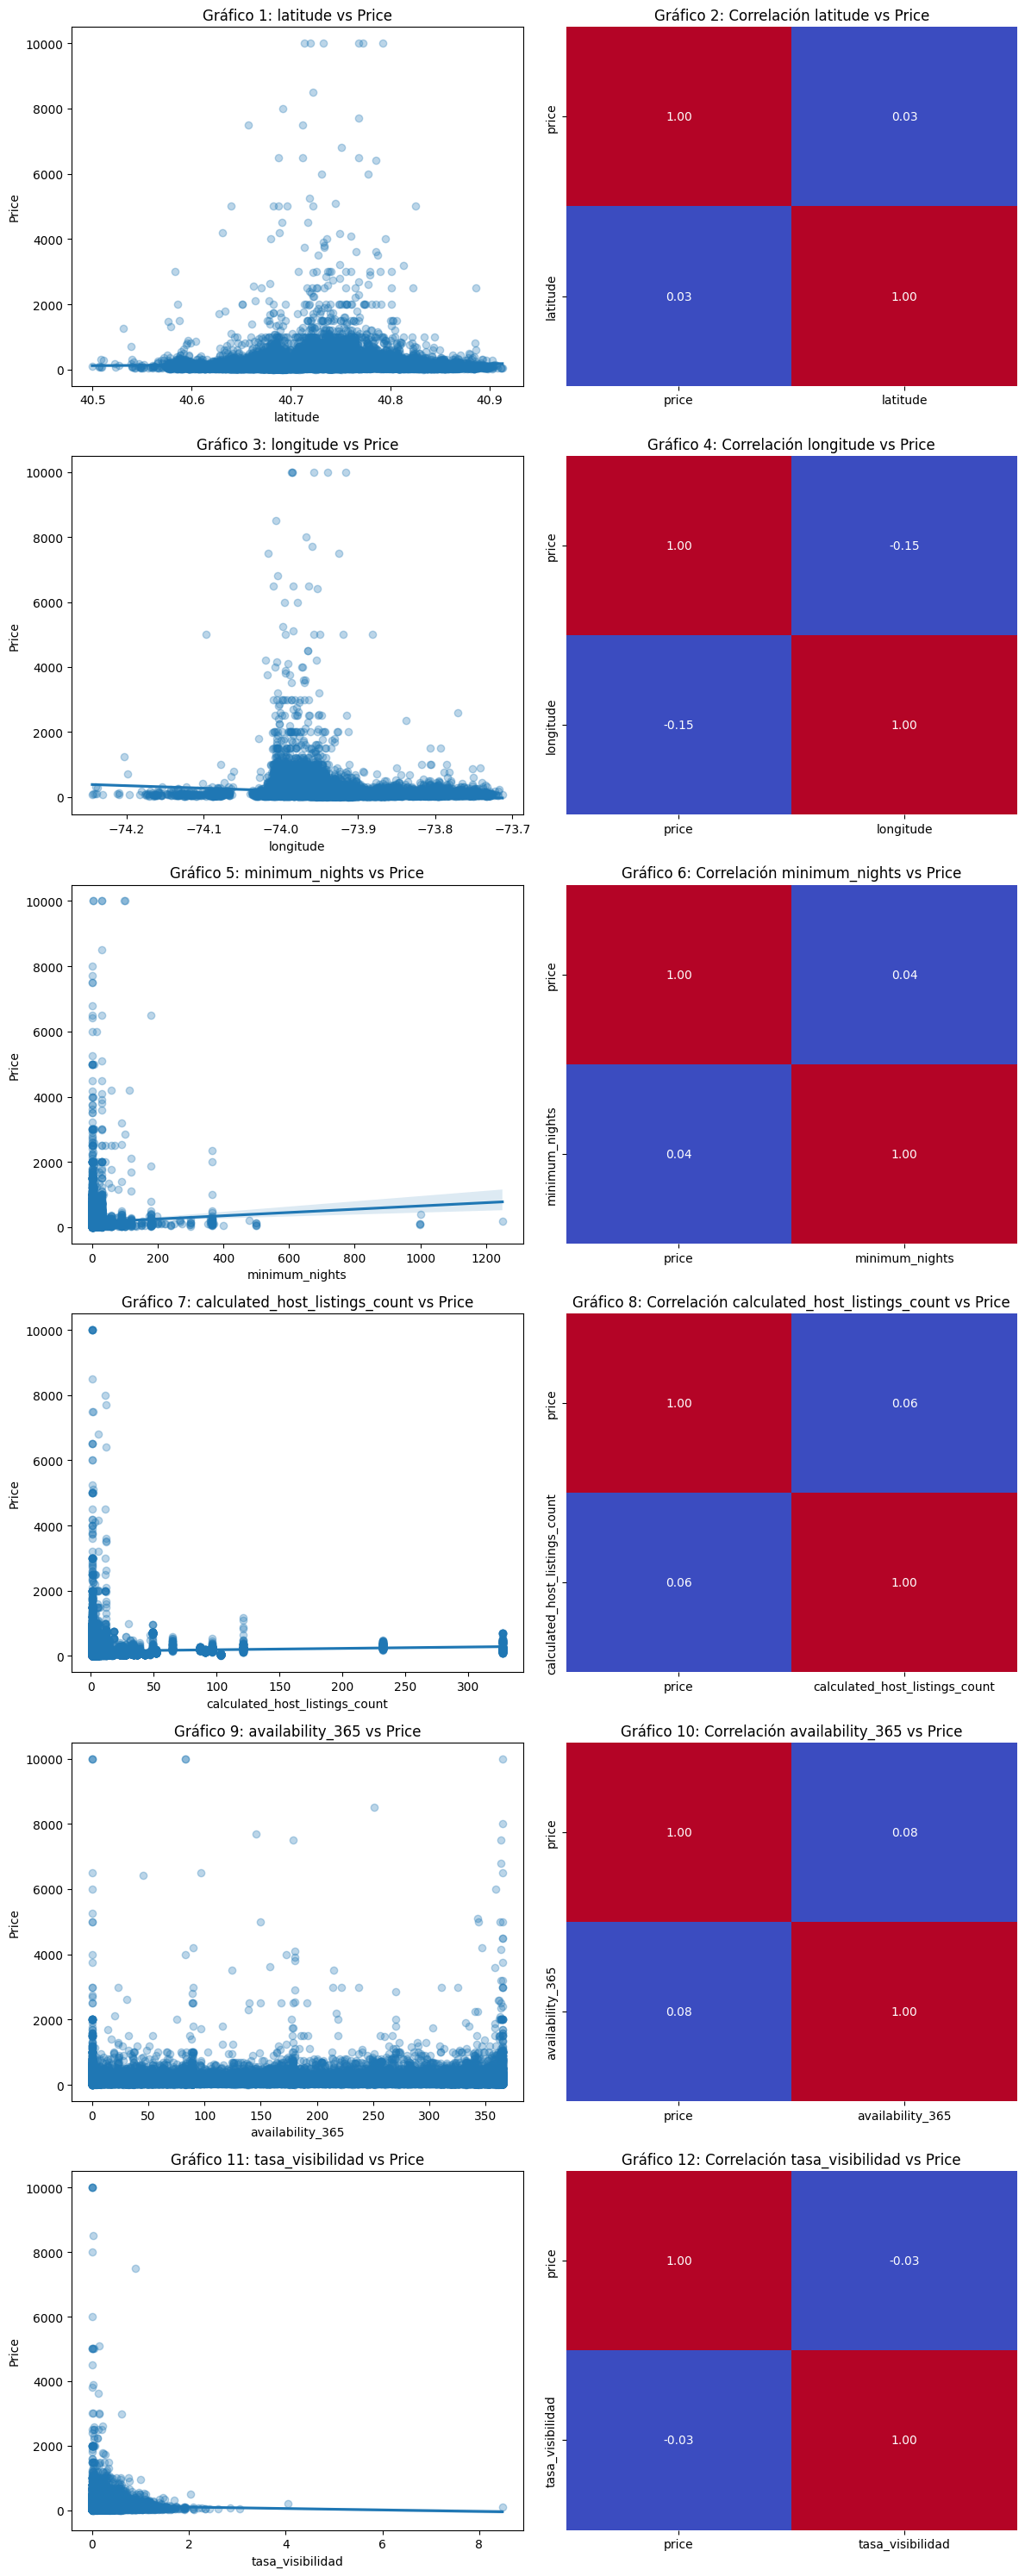

In [334]:
# Seleccion de todas las columnas numéricas (int y float),
#excluyendo 'price', dado que todas seran comparadas contra
#la variable de interes (price)

num_columnas = df_modif.select_dtypes(include=['int64','float64']).columns.drop('price')

# Número de columnas numéricas
n_cols = len(num_columnas)

# Creando gráficos por variable (regplot + heatmap)
fig, axes = plt.subplots(n_cols, 2, figsize=(12, 5*n_cols))

grafico_num = 1  # contador de gráficos

for i, col in enumerate(num_columnas):
    # Gráfico de dispersión con línea de regresión
    sns.regplot(ax=axes[i,0], data=df_modif, x=col, y='price', scatter_kws={'alpha':0.3})
    axes[i,0].set_title(f"Gráfico {grafico_num}: {col} vs Price")
    axes[i,0].set_ylabel("Price")
    axes[i,0].set_xlabel(col)
    grafico_num += 1

    # Heatmap de correlación
    corr = df_modif[['price', col]].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", ax=axes[i,1], cbar=False, cmap="coolwarm")
    axes[i,1].set_title(f"Gráfico {grafico_num}: Correlación {col} vs Price")
    grafico_num += 1

plt.tight_layout()
plt.show()

Observaciones:

*La unica variable que muestra cierta relacion con el precio es la longitud, con un coeficiente de correlacion de -0.15, aunque la relacion es debil. La latitud practicamente no tiene relacion con el precio.

Vale la pena recordar que la longitud es el desplezamiento Este-Oeste (desde Greenwich hacia oriente u occidente). Mientras que la latitud mide el desplazamiento Norte-Sur (desde el ecuador hacia los polos).

**Analisis categorico - categorico**

*Dentro de las variables categoricas estan: 'neighbourhood_group', 'neighbourhood', 'room_type'.

Nota. Con el fin de evitar redundancias en las observaciones, las variables categoricas fueron graficadas y analizadas de manera individual en el Paso 3, lo que permitio obtener una caracterizacion detallada de cada una. En el presente apartado, el analisis se orienta hacia la interaccion entre variables categoricas especificas, particularmente el cruce entre neighbourhood_group y room_type, con el objetivo de evaluar su incidencia conjunta sobre la variable objetivo price.

In [335]:
df_modif.shape[0]

48895

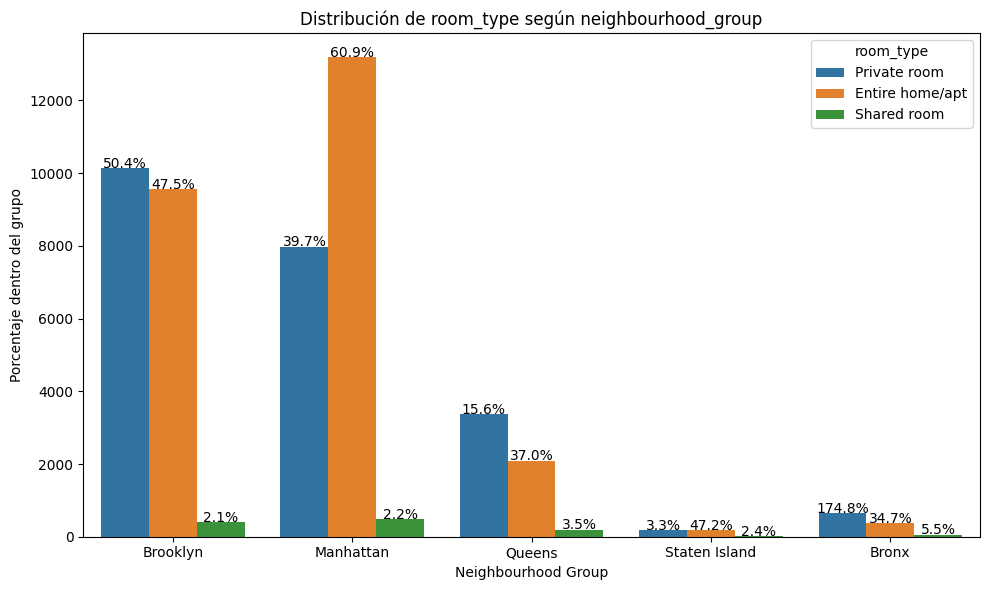

In [336]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_modif,
                   x="neighbourhood_group",
                   hue="room_type")

plt.title("Distribución de room_type según neighbourhood_group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Porcentaje dentro del grupo")

# Totales por grupo
group_totals = df_modif.groupby("neighbourhood_group").size()

# Anotar porcentaje relativo a cada grupo
for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue
    # El índice del grupo al que pertenece la barra
    group_idx = int(p.get_x() + p.get_width()/2)
    # Nombre del grupo (categoría en el eje X)
    group_name = ax.get_xticklabels()[group_idx].get_text()
    # Total de registros en ese grupo
    total_group = group_totals[group_name]
    porcentaje = 100 * height / total_group

    ax.text(p.get_x() + p.get_width()/2,
            height + 5,
            f'{porcentaje:.1f}%',
            ha='center')

plt.tight_layout()
plt.show()


Observaciones:

*En Manhattan el 60.9% anuncia inmuebles entirehome/apto, mientras que en Brooklyn ofrecen como primera opcion private room con un 50.4% seguido muy de cerca entirehome/apto con un 47.5%.

*En Queens, State Island y Bronx no existen tantos anuncios como en los distritos anteriores Manhattan y Brooklyn.

**Analisis de correlaciones**

Nota. La variable objetivo es price, por lo que se evaluara la correlacion de Spearman entre cada variable categorica y el precio, en lugar de realizar un analisis de asociacion entre variables categoricas mediante tablas de contingencia. El analisis de asociaciones entre variables categoricas se presentara en el apartado siguiente, como complemento al estudio de correlaciones con la variable objetivo.

Analisis categorico-numerico (completo)

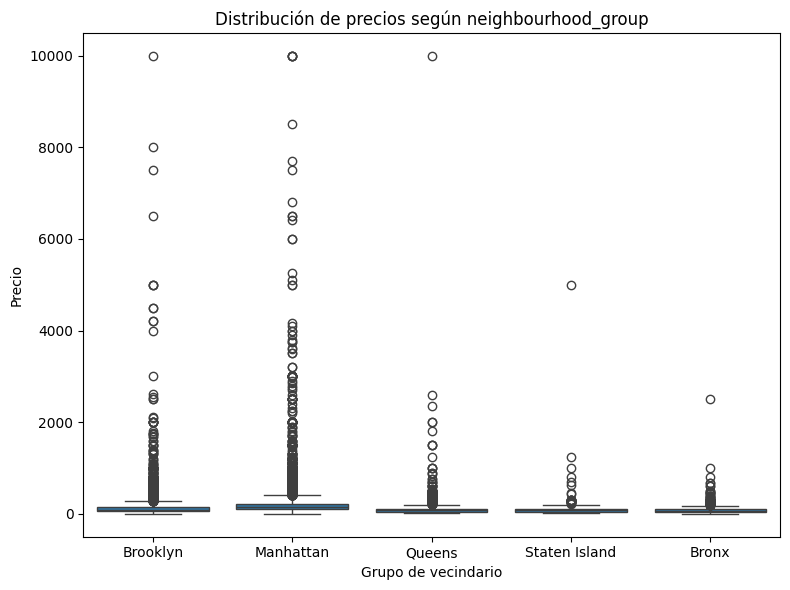

In [337]:
#grafico de price con "neighbourhood_group"

plt.figure(figsize=(8,6))
sns.boxplot(data=df_modif, x="neighbourhood_group", y="price")
plt.title("Distribución de precios según neighbourhood_group")
plt.xlabel("Grupo de vecindario")
plt.ylabel("Precio")
plt.tight_layout()
plt.show()

Observaciones. La variable price tiene muchos outliers, por lo tanto en el paso 5, se transformara para que sea mas legible su interaccion con otras variables, sin embargo graficaremos los barrios, enfocandonos en el percentil 75 del precio y que se concentre el 80% de los barrios con mas anuncios.


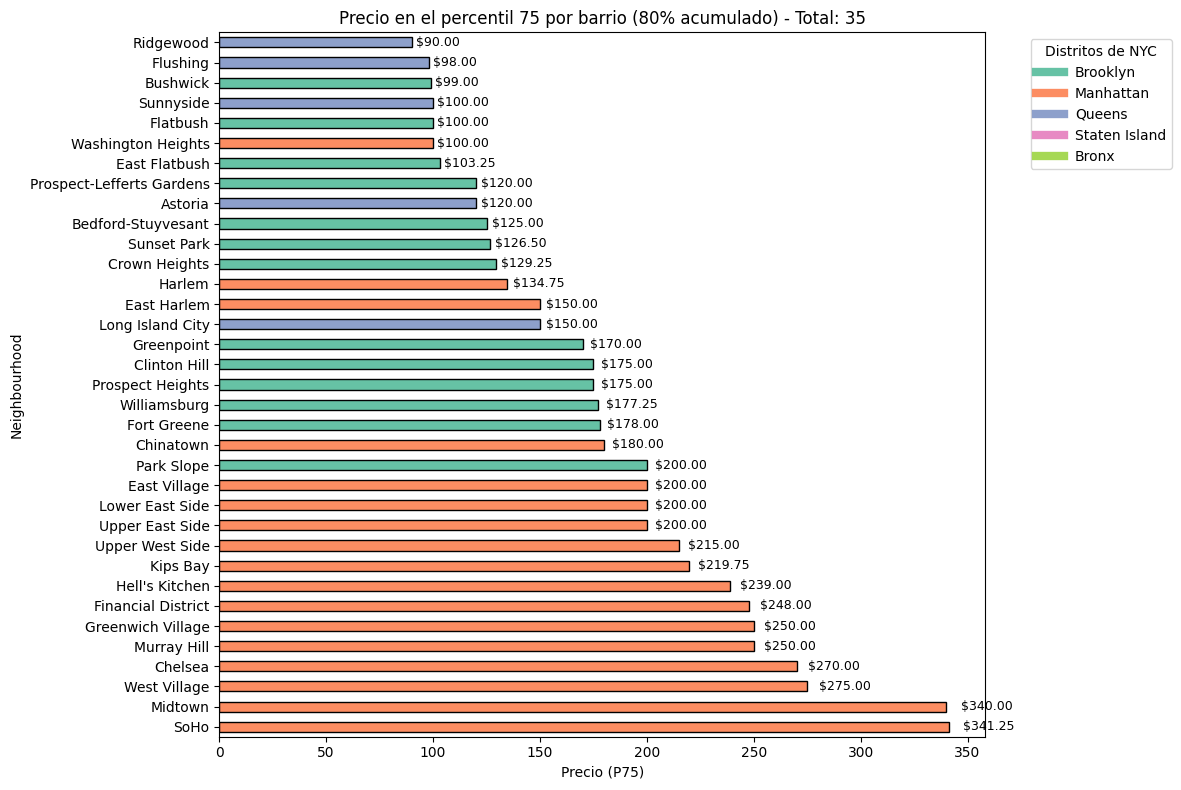

In [338]:
#El grafico por barrios con percentil 75 del precio, tal como se indico arriba

# Frecuencia relativa de neighbourhood
frec_rel = df_modif['neighbourhood'].value_counts(normalize=True)

# Barrios que concentran el 80%
top_neigh = frec_rel[frec_rel.cumsum() <= 0.8]

# Cantidad total de barrios en ese 80%
num_barrios_80 = len(top_neigh)

# Calcular percentil 75 por barrio (solo los del top 80%)
p75_prices = df_modif.groupby('neighbourhood')['price'].quantile(0.75)

# Seleccionar solo los barrios del top 80%
top_p75_prices = p75_prices.loc[top_neigh.index]

# Ordenar de mayor a menor percentil 75
top_p75_prices = top_p75_prices.sort_values(ascending=False)

# Crear un mapa de colores por neighbourhood_group
unique_groups = df_modif['neighbourhood_group'].unique()
color_palette = sns.color_palette("Set2", len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))

# Asignar colores según el grupo
bar_colors = [
    color_map[df_modif.loc[df_modif['neighbourhood'] == neigh, 'neighbourhood_group'].iloc[0]]
    for neigh in top_p75_prices.index
]

# Gráfico de barras horizontales con percentil 75
plt.figure(figsize=(12,8))
ax = top_p75_prices.plot(kind='barh', color=bar_colors, edgecolor='black')

plt.title(f"Precio en el percentil 75 por barrio (80% acumulado) - Total: {num_barrios_80}")
plt.xlabel("Precio (P75)")
plt.ylabel("Neighbourhood")

# Añadir valores del percentil 75 al final de cada barra
for i, (neigh, value) in enumerate(top_p75_prices.items()):
    plt.text(value + (value*0.02), i, f"${value:.2f}", va='center', fontsize=9, color='black')

# Leyenda con nombres de distritos
legend_patches = [
    plt.Line2D([0], [0], color=color_map[g], lw=6, label=g) for g in unique_groups
]
plt.legend(handles=legend_patches, title="Distritos de NYC", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Observaciones:

*La grafica anterior da mucha informacion, el percentil 75% de los precios en cada barrio apunta a Manhattan, en especial Midtown o Soho. Ahora busquemos las coordenas de 'latitude' y 'longitude' por ejemplo de Midtown.

*Midtown Manhattan tiene a sus alrededores el Times Square, la estación Grand Central y el Empire State, es decir una zona altamente atractiva para los alquileres.

In [339]:
df_modif.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,tasa_visibilidad
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,0.013462
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355,0.044882
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365,NaN


Observaciones:

*Midtown tiene latitude: 40.75362, longitude: -73.98377.

*Con esa informacion buscaremos la distancia de todos los anuncios a las coordenadas de Midtown.

In [340]:
#Calculo de la distancia de cada registro apuntando a Midtown.
from geopy.distance import geodesic

# Coordenadas de Midtown Manhattan
midtown_coords = (40.75362, -73.98377)

# Crear nueva columna con la distancia en km desde cada fila a Midtown
df_modif['distancia_midtown_km'] = df_modif.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), midtown_coords).kilometers,
    axis=1
)

# Verificar las primeras filas
print(df_modif[['latitude', 'longitude', 'distancia_midtown_km']].head())

   latitude  longitude  distancia_midtown_km
0  40.64749  -73.97237             11.824854
1  40.75362  -73.98377              0.000000
2  40.80902  -73.94190              7.095115
3  40.68514  -73.95976              7.870533
4  40.79851  -73.94399              6.010648


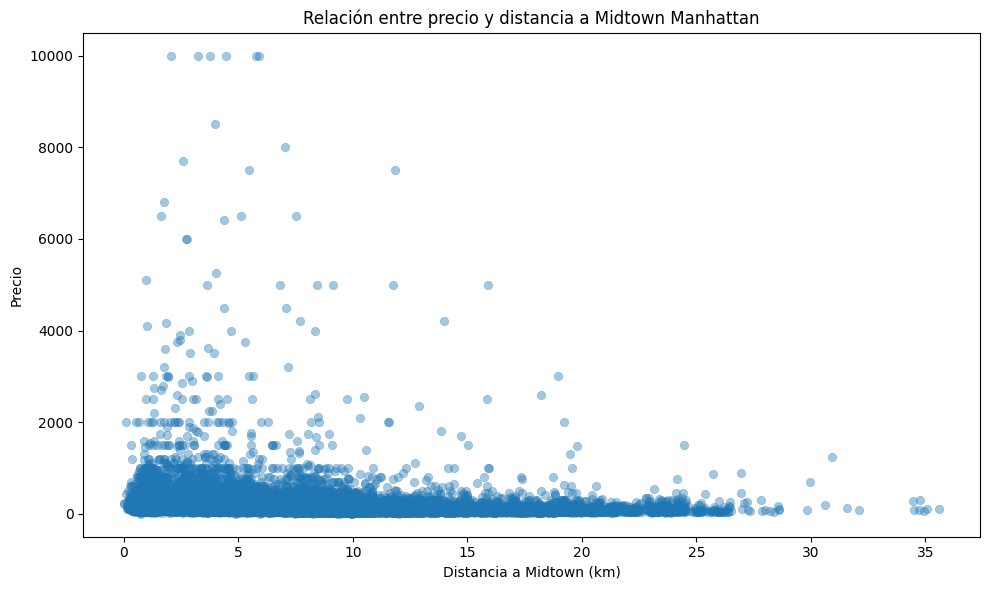

In [341]:
# Gráfico de dispersión entre price y distancia_midtown_km

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_modif, x='distancia_midtown_km', y='price', alpha=0.4, edgecolor=None)

plt.title('Relación entre precio y distancia a Midtown Manhattan')
plt.xlabel('Distancia a Midtown (km)')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()


Observaciones.

Ese grafico da una informacion relevante, que a medida que me alejo de midtown los preciso van disminuyendo.

In [342]:
df_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
 9   tasa_visibilidad                38843 non-null  float64
 10  distancia_midtown_km            48895 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.1+ MB


Esta seria el DataFrame modificado en virtud de las ultimas observaciones dado que 'latitude' y 'longitude' se recogen en la nueva variable 'distancia_midtown_km'

In [343]:
df_modif = df_modif.drop(columns=["latitude", "longitude"])

# Verificar que ya no estén en el DataFrame
df_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   calculated_host_listings_count  48895 non-null  int64  
 6   availability_365                48895 non-null  int64  
 7   tasa_visibilidad                38843 non-null  float64
 8   distancia_midtown_km            48895 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


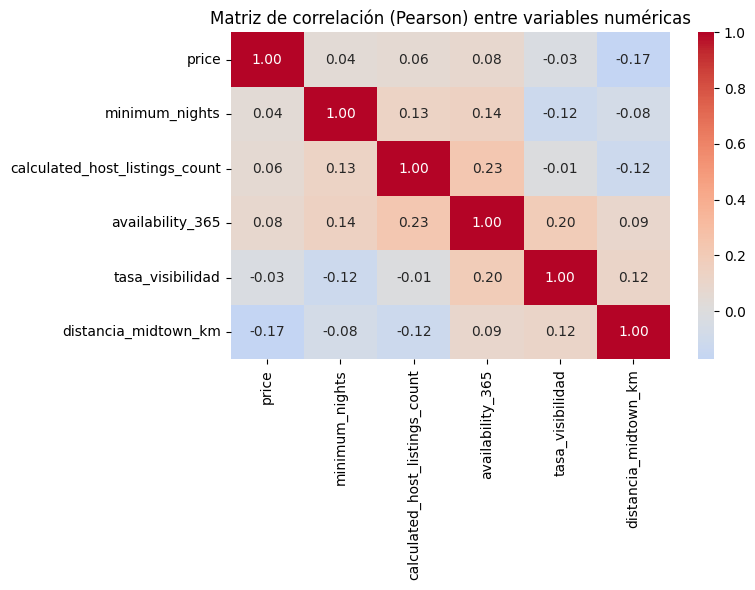

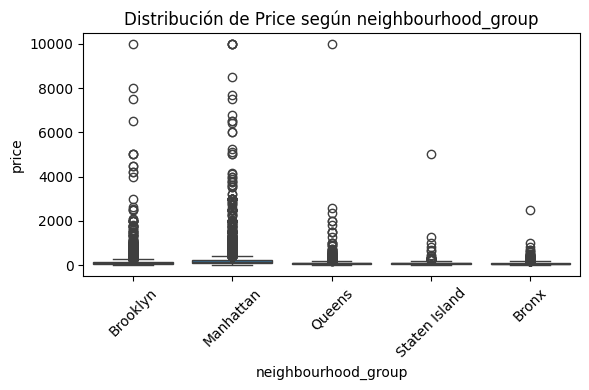

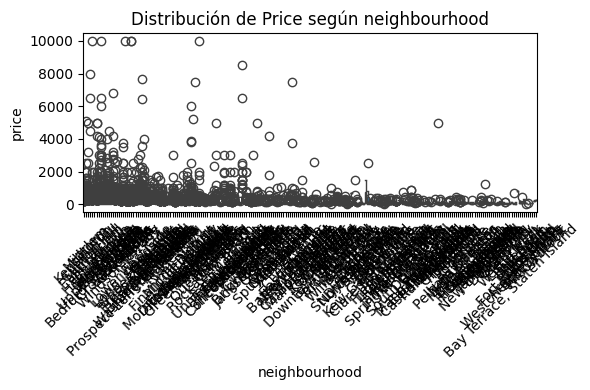

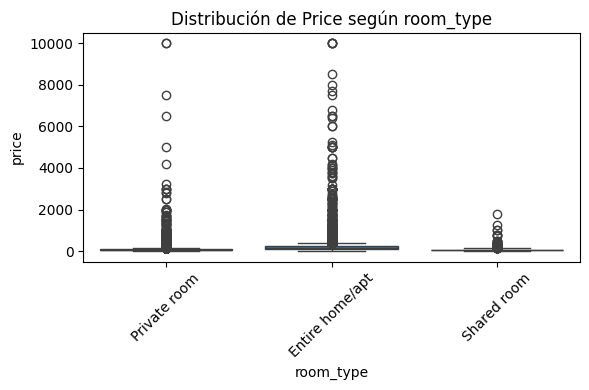

In [344]:
# --- 1. Correlación únicamente entre variables numéricas (Pearson) ---
num_cols = df_modif.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df_modif[num_cols].corr(method="pearson"),
            annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación (Pearson) entre variables numéricas")
plt.tight_layout()
plt.show()

# --- 2. Relación numérico–categórico mediante boxplots ---
cat_cols = df_modif.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='price', data=df_modif)
    plt.title(f"Distribución de Price según {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Observaciones:

*En la primera grafica,las variables que tienen mayor coeficiente de correlacion de Pearson con el precio son:

Correlacion baja:
   -distancia_midtown_km con -0.17 correlacion negativa.

Correlacion muy baja:
 -availability_365 con 0.08.
 -calculated_host_listing_count con 0.06.
  -minimun_nights con 0.04.
 -tasa_visibilidad con -0.03.

 Nota: la correlacion de Pearson mide la relacion lineal (recta entre dos variables)

*Los tres boxplots siguientes que comparan las variables categoricas con la toalidad de los valores incluidos en price, es poco legible,razon por la cual se realizaran analisis adicionales.

Cabe destacar que se realizo un grafico entre neighbourhood y price de barras horizontales, donde se incluyo el percentil 75 de la variable price y unos cuantos barrios que representaban que concentraban el 80% de los anuncios para tener mayor claridad sobre el resultado en conjunto de ambas variables.

Paso 5: Ingeniería de funciones

Este apartado implica la creacion de nuevas caracteristicas (o variables) a partir de las existentes para mejorar el rendimiento del modelo.

En los pasos previos se empezo a trabajar con los datos, contabilizando los valores nulos, tranformando variables, calculando correlaciones, etcetera, todo con el objeto de ir mejorando la visualizacion e inlcuso la interpretacion.

 Si bien esto podríamos haberlo hecho en este paso, ya que forma parte de la ingeniería de características, normalmente suele hacerse antes de analizar las variables, separando este proceso en uno previo y este que vamos a ver a continuación.

La variable distancia_midtown_km forma parte de la ingenieria de variable, ya que se tomo informacion espacial de neighbourhood y neighbourhood_group, resumiendose en una metrica continua que refleja la distancia a la localidad (midtown) punto donde figuraban los precios mas altos considerando el percentil 75 de la variable precio, tal y como se indico en pasos previos.

In [345]:
#Partiendo de lo anterior, podriamos reducir nuevamente el tamano del DataFrame
#eliminando las columnas neighbourhood y neighbourhood_group

df_nuev = df_modif.drop(columns=["neighbourhood", "neighbourhood_group"])

Ahora bien, vamos a trabajar un poco sobre la variable price para precisar la forma como se abordaran los outliers.

In [346]:
df_nuev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       48895 non-null  object 
 1   price                           48895 non-null  int64  
 2   minimum_nights                  48895 non-null  int64  
 3   calculated_host_listings_count  48895 non-null  int64  
 4   availability_365                48895 non-null  int64  
 5   tasa_visibilidad                38843 non-null  float64
 6   distancia_midtown_km            48895 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.6+ MB


Ahora bien, vamos a trabajar un poco sobre la variable price para precisar la forma como se abordaran los outliers.

In [347]:
"""comprobacion si la variable price sigue una distribucion normal con el
test de Kolmogorov-Smirnov dado que Shapiro funciona bien para registros"""

from scipy.stats import kstest, norm
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=UserWarning)

# Variable a analizar
data = df_nuev["price"]

print("Hipótesis nula: los datos provienen de una distribución normal")
print("Criterio: Si el p-value < 0.05 → se rechaza la normalidad\n")

# --- Kolmogorov-Smirnov Test ---
# Normalizamos los datos para compararlos contra una N(0,1)
data_norm = (data - data.mean()) / data.std()

stat, p = kstest(data_norm, 'norm')
print("Kolmogorov-Smirnov Test: stat=%.3f, p=%.3f" % (stat, p))

if p < 0.05:
    print("→ Se rechaza la hipótesis nula (los datos NO siguen una distribución normal)")
else:
    print("→ No se rechaza la hipótesis nula (los datos podrían seguir una distribución normal)")

Hipótesis nula: los datos provienen de una distribución normal
Criterio: Si el p-value < 0.05 → se rechaza la normalidad

Kolmogorov-Smirnov Test: stat=0.296, p=0.000
→ Se rechaza la hipótesis nula (los datos NO siguen una distribución normal)


La variable price al no seguir una distribucion normal, convenientemente trabajaremos con el rango intercuartil, tal como hicimos en pasos anteriores que truncamos la variable price al percentil 75.

In [348]:
stats = df_nuev["price"].describe()

# Calcular IQR
iqr = stats["75%"] - stats["25%"]

# Límite superior (regla de Tukey)
upper_limit = stats["75%"] + 1.5 * iqr

# Filtrar el DataFrame usando ese límite
new_data = df_nuev[df_nuev["price"] <= upper_limit]


In [364]:
new_data.shape[0], df_nuev.shape[0] #comparacion de los grupos, aplicando upper_limit y no

(45458, 48895)

In [350]:
stats = df_nuev['distancia_midtown_km'].describe()

# Calcular IQR
iqr = stats['75%'] - stats['25%']

# Límite superior
upper_limit = stats['75%'] + 1.5 * iqr

# Filtrar el DataFrame usando ese límite
new_data2 = df_nuev[df_nuev['distancia_midtown_km'] <= upper_limit]


In [351]:
new_data2.shape[0]

47415

Con estos pasos estamos verificando que tanto se modifica el DataFrame trabajando con el Q3+1.5*IQR (percentil 75 +1.5 veces el rango intercuartilico), tanto en la variable price como en la variable distancia_midtown_km.

Reduciremos los outliers sobre la variable price.

Analisis de outliers

In [352]:
df_nuev.describe().round(2)

,price,minimum_nights,calculated_host_listings_count,availability_365,tasa_visibilidad,distancia_midtown_km
count,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00
mean,152.72,7.03,7.14,112.78,0.18,6.89
std,240.15,20.51,32.95,131.62,0.24,4.37
min,0.00,1.00,1.00,0.00,0.00,0.00
25%,69.00,1.00,1.00,0.00,0.01,3.58
50%,106.00,3.00,1.00,45.00,0.07,6.33
75%,175.00,5.00,2.00,227.00,0.27,9.05
max,10000.00,1250.00,327.00,365.00,8.48,35.60


En la columna price se observa que hasta el percentil 75% los precios estan alrededor de $175, por lo tanto al compararlo con el maximo de $10000, se entiende que hay valores atipicos.

Diagramas de Caja

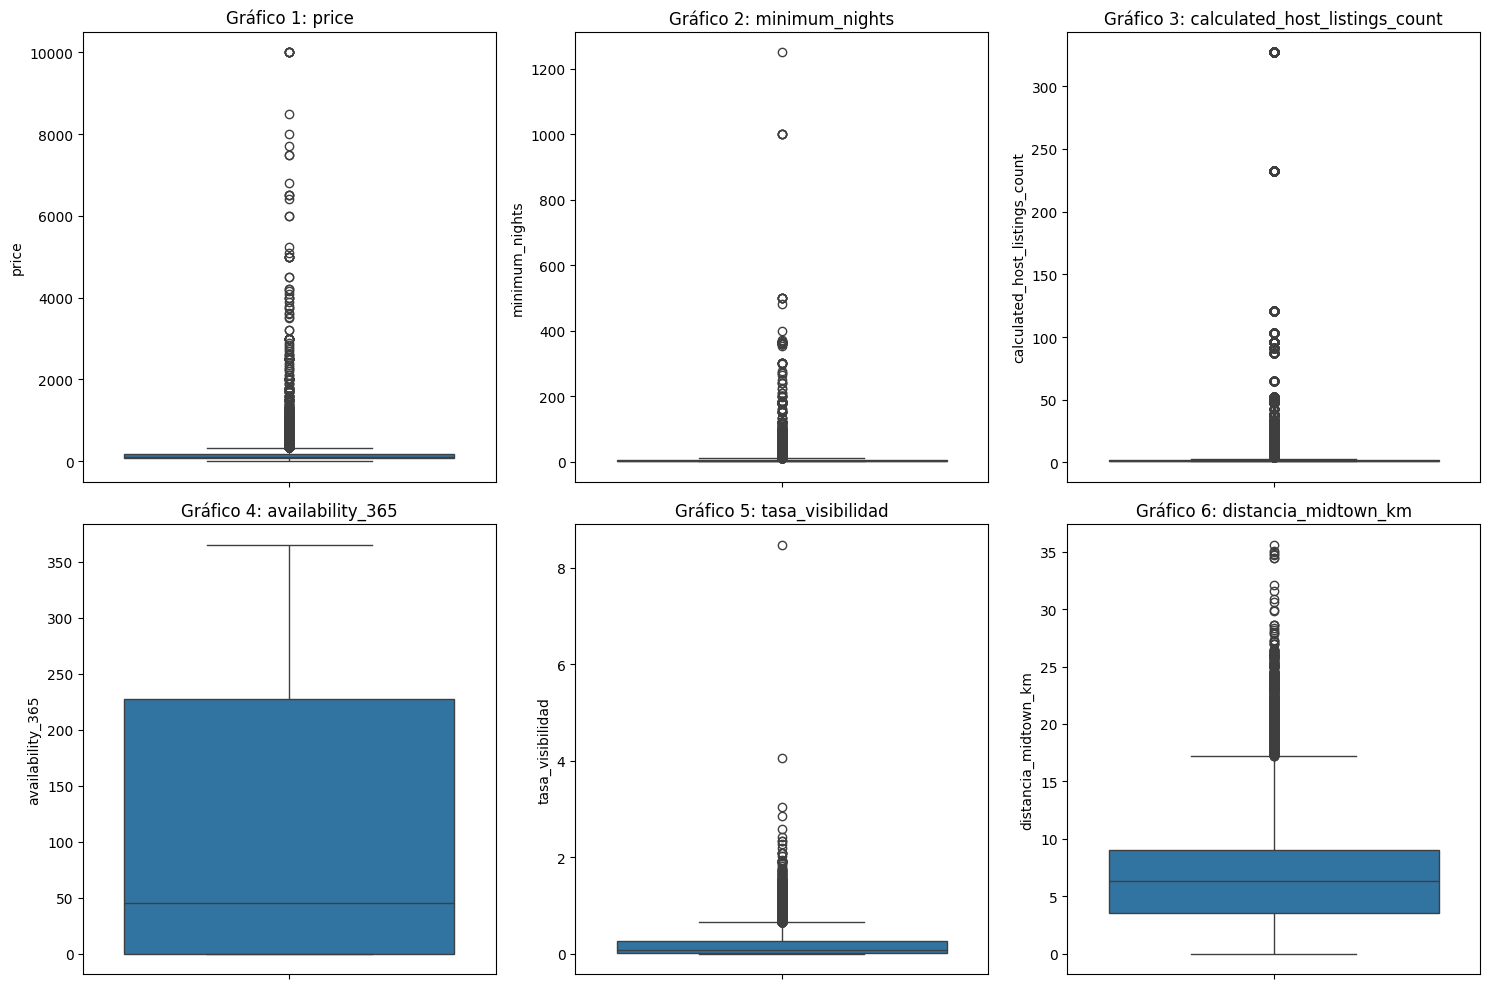

In [353]:
# Crear la cuadrícula de subplots (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista de variables a graficar
vars_plot = [
    "price", "minimum_nights",
    "calculated_host_listings_count", "availability_365", "tasa_visibilidad",
    "distancia_midtown_km"
]

# Generar los gráficos con numeración
grafico_num = 1
for i in range(2):          # ahora solo 2 filas
    for j in range(3):      # 3 columnas
        col = vars_plot[grafico_num-1]
        sns.boxplot(ax=axes[i, j], data=df_nuev, y=col)
        axes[i, j].set_title(f"Gráfico {grafico_num}: {col}")
        grafico_num += 1

plt.tight_layout()
plt.show()


Observaciones

Todos los graficos, excepto el relacionado con la availability_365 y tienen valores atipicos.

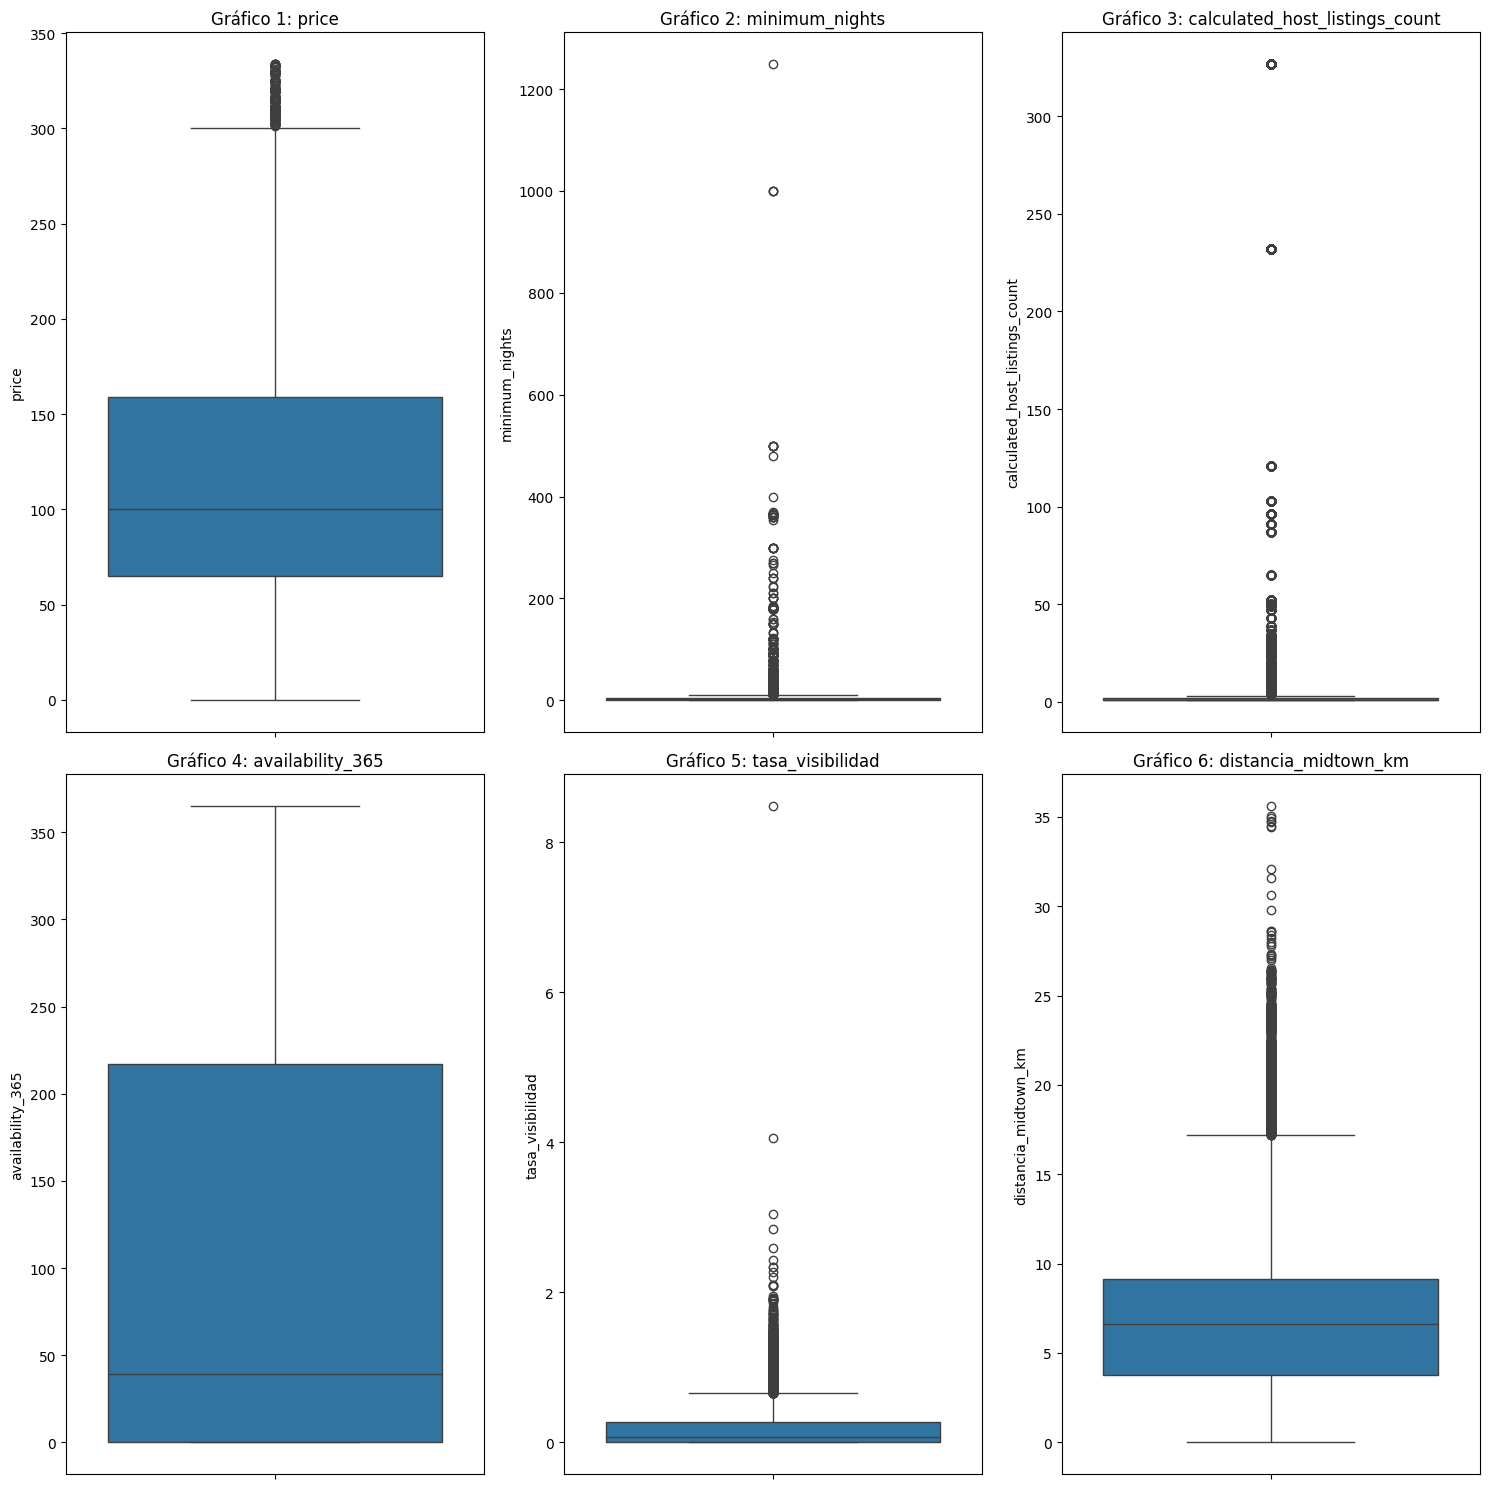

In [354]:
#boxplot para visualizar  el percentil 75 del DataFrame por la variable price
# Crear la cuadrícula de subplots (3x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Lista de variables a graficar (solo las que existen en df_price_filtrado)
vars_plot = [
    "price", "minimum_nights",
    "calculated_host_listings_count", "availability_365", "tasa_visibilidad",
    "distancia_midtown_km"
]

# Generar los gráficos con numeración
grafico_num = 1
for i in range(2):
    for j in range(3):
        if grafico_num <= len(vars_plot):
            col = vars_plot[grafico_num-1]
            sns.boxplot(ax=axes[i, j], data=new_data, y=col)
            axes[i, j].set_title(f"Gráfico {grafico_num}: {col}")
            grafico_num += 1
        else:
            axes[i, j].axis("off")  # Desactiva subplots vacíos

plt.tight_layout()
plt.show()

En la variable minimum_nights, se observan valores por encima de 1000 o 400 dias, por lo tanto se le establecera una cota de 365 dias. Mientras que la variable calculated_host_listings_count, se le establecera un tope de 150, porque pueden existir empresas, que actuan como anfitriones, que tengan muchos anuncios.

El resto de las variables tienen unos limites razonables.

In [355]:
new_data = new_data[
    (new_data['minimum_nights'] <= 365) &
    (new_data['calculated_host_listings_count'] <= 150)
]


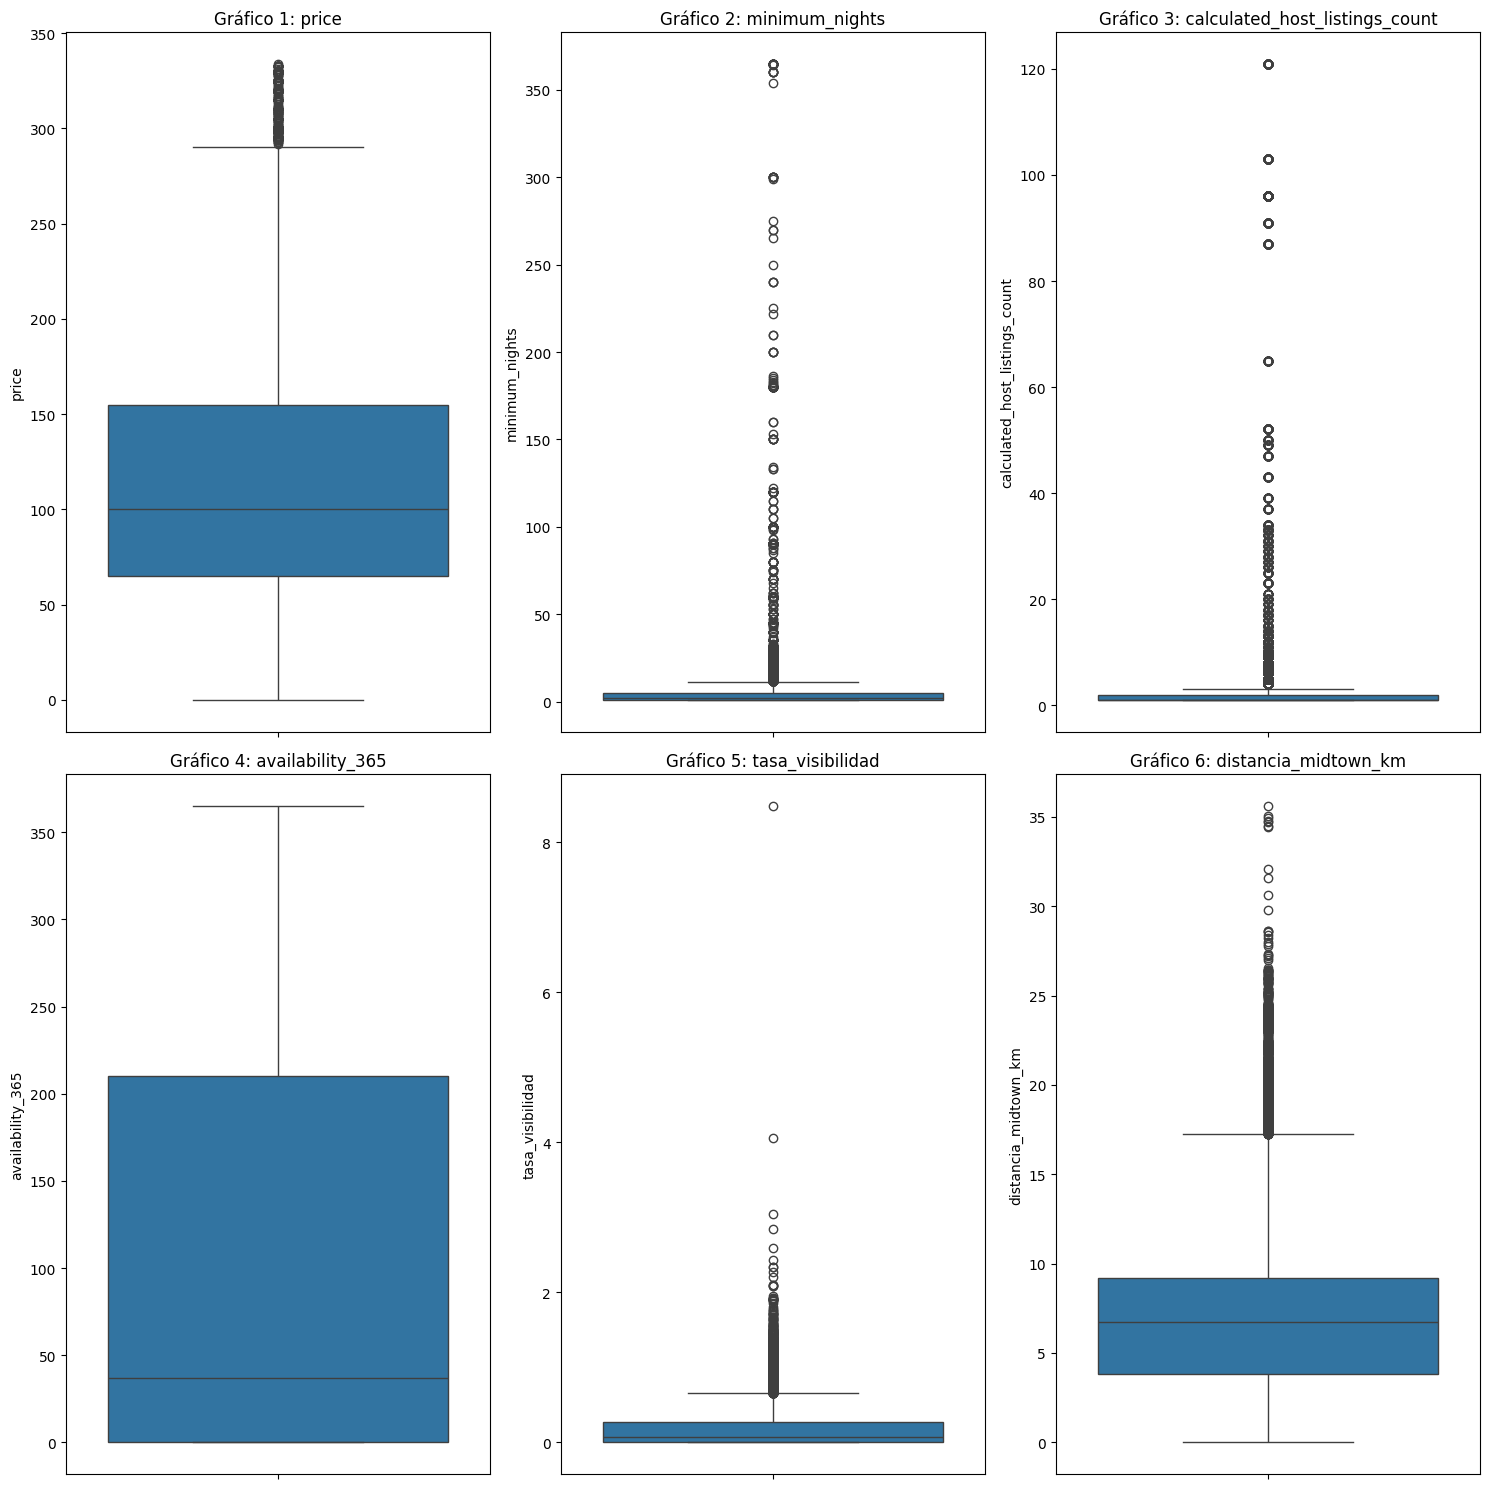

In [356]:
#boxplot para visualizar  como quedan todas las variables
# Crear la cuadrícula de subplots (3x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Lista de variables a graficar (solo las que existen en df_price_filtrado)
vars_plot = [
    "price", "minimum_nights",
    "calculated_host_listings_count", "availability_365", "tasa_visibilidad",
    "distancia_midtown_km"
]

# Generar los gráficos con numeración
grafico_num = 1
for i in range(2):
    for j in range(3):
        if grafico_num <= len(vars_plot):
            col = vars_plot[grafico_num-1]
            sns.boxplot(ax=axes[i, j], data=new_data, y=col)
            axes[i, j].set_title(f"Gráfico {grafico_num}: {col}")
            grafico_num += 1
        else:
            axes[i, j].axis("off")  # Desactiva subplots vacíos

plt.tight_layout()
plt.show()

Aun cuando hay variables que parecieran tener outliers los mismos se encuentran dentro de limites razonables.

Analisis de valores faltantes

In [357]:
new_data.isnull().sum().sort_values(ascending=False)

,0
tasa_visibilidad,8743
price,0
room_type,0
minimum_nights,0
calculated_host_listings_count,0
availability_365,0
distancia_midtown_km,0


In [368]:
#Eliminando los valores faltantes en tasa_visibilidad

new_data = new_data.dropna()


In [369]:
new_data.isnull().sum().sort_values(ascending=False)

,0
room_type,0
price,0
minimum_nights,0
calculated_host_listings_count,0
availability_365,0
tasa_visibilidad,0
distancia_midtown_km,0


In [371]:
new_data.shape

(36715, 7)

Conclusion.

El  DataFrame ya se encuentra depurado,cuenta con 36715 filas y 7 columnas y con las variables room_type,minimum_nights,alculated_host_listings_count, availability_365, tasa_visibilidad y distancia_midtown_km, las cuales pudieran describir la variable objetivo price.

Aplicando una regresion lineal por curiosidad

In [372]:
import statsmodels.formula.api as smf

print(smf.ols("price ~ distancia_midtown_km + tasa_visibilidad + minimum_nights + calculated_host_listings_count+availability_365+C(room_type)", data=new_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     4874.
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        04:19:35   Log-Likelihood:            -1.9377e+05
No. Observations:               36715   AIC:                         3.875e+05
Df Residuals:                   36707   BIC:                         3.876e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Tiene un R-squared = 0.482, lo que significa que el modelo esta explicando alrededor del 48% de la variabilidad de la variable price.

Adicionalmente, todas las variables tienen un p-value = 0.000, excepto tasa_visibilidad que tiene un p-value = 0.016, esto significa que practicamente todas las variables son estadisticamente significativas,

Las variables que mejor explicarian el modelo, por sus estadisticos t, serian room_type, distancia_midtown_km y availability_365. Las otras variables minimum_nights y calculated_host_listing_count aportan pero en menor magnitud. La tasa_visibilidad es la mas debil de todas, pero igual aporta.